In [ ]:
# libraries 

import polars as pl
import matplotlib.pyplot as plt
import numpy as np 
import plotnine as pn

In [15]:
# reading processed parquet file
df = pl.read_parquet('2022_place.parquet')

In [16]:
# assuring that it's sorted 
df = df.sort('timestamp') 

In [17]:
# obtain time differences between pixel placements 
df = df.with_columns(pl.col('timestamp').dt.round('100ms').diff().over('user_id').alias('time_diff'))

In [18]:
# obtain users' pixel placement interval counts, and filter by 2 or more consecutive same time interval placements (which would be bots)

bots = df.with_columns((pl.col("time_diff").shift(-1) == pl.col("time_diff")).over("user_id").alias("same_diff")).group_by("user_id").agg(pl.col("same_diff").sum().alias("consecutive_duplicates")).filter(pl.col('consecutive_duplicates') > 0)

In [19]:
bots.sort('consecutive_duplicates')

shape: (164_654, 2)
┌─────────┬────────────────────────┐
│ user_id ┆ consecutive_duplicates │
│ ---     ┆ ---                    │
│ u32     ┆ u32                    │
╞═════════╪════════════════════════╡
│ 7801488 ┆ 1                      │
│ 8756935 ┆ 1                      │
│ 3963212 ┆ 1                      │
│ 2605084 ┆ 1                      │
│ 9034046 ┆ 1                      │
│ …       ┆ …                      │
│ 7171895 ┆ 162                    │
│ 5313523 ┆ 165                    │
│ 4876926 ┆ 170                    │
│ 9030676 ┆ 203                    │
│ 289604  ┆ 215                    │
└─────────┴────────────────────────┘

In [20]:
# bot activity 
bot_activity = df.join(bots, on='user_id').with_columns(pl.lit('bot').alias('user_type'))

In [27]:
bot_activity

shape: (14_854_384, 8)
┌────────────────┬─────────┬─────────────┬──────┬──────┬───────────────┬───────────────┬───────────┐
│ timestamp      ┆ user_id ┆ pixel_color ┆ x    ┆ y    ┆ time_diff     ┆ consecutive_d ┆ user_type │
│ ---            ┆ ---     ┆ ---         ┆ ---  ┆ ---  ┆ ---           ┆ uplicates     ┆ ---       │
│ datetime[μs]   ┆ u32     ┆ str         ┆ i32  ┆ i32  ┆ duration[μs]  ┆ ---           ┆ str       │
│                ┆         ┆             ┆      ┆      ┆               ┆ u32           ┆           │
╞════════════════╪═════════╪═════════════╪══════╪══════╪═══════════════╪═══════════════╪═══════════╡
│ 2022-04-01     ┆ 8381403 ┆ #51E9F4     ┆ 565  ┆ 590  ┆ null          ┆ 1             ┆ bot       │
│ 13:03:50.948   ┆         ┆             ┆      ┆      ┆               ┆               ┆           │
│ 2022-04-01     ┆ 5549669 ┆ #FF99AA     ┆ 612  ┆ 571  ┆ null          ┆ 1             ┆ bot       │
│ 13:03:53.068   ┆         ┆             ┆      ┆      ┆               ┆               ┆           │
│ 2022-04-01     ┆ 1793873 ┆ #FF4500     ┆ 153  ┆ 106  ┆ null          ┆ 3             ┆ bot       │
│ 13:03:54.502   ┆         ┆             ┆      ┆      ┆               ┆               ┆           │
│ 2022-04-01     ┆ 2278991 ┆ #000000     ┆ 490  ┆ 742  ┆ null          ┆ 1             ┆ bot       │
│ 13:03:54.581   ┆         ┆             ┆      ┆      ┆               ┆               ┆           │
│ 2022-04-01     ┆ 2388989 ┆ #FF4500     ┆ 0    ┆ 0    ┆ null          ┆ 1             ┆ bot       │
│ 13:03:54.738   ┆         ┆             ┆      ┆      ┆               ┆               ┆           │
│ …              ┆ …       ┆ …           ┆ …    ┆ …    ┆ …             ┆ …             ┆ …         │
│ 2022-04-05     ┆ 2600365 ┆ #FFFFFF     ┆ 371  ┆ 936  ┆ 5m 36s 200ms  ┆ 1             ┆ bot       │
│ 00:13:58.660   ┆         ┆             ┆      ┆      ┆               ┆               ┆           │
│ 2022-04-05     ┆ 7322433 ┆ #FFFFFF     ┆ 534  ┆ 778  ┆ 9m 33s 600ms  ┆ 1             ┆ bot       │
│ 00:13:58.983   ┆         ┆             ┆      ┆      ┆               ┆               ┆           │
│ 2022-04-05     ┆ 9739493 ┆ #FFFFFF     ┆ 1365 ┆ 1582 ┆ 9m 1s 300ms   ┆ 2             ┆ bot       │
│ 00:13:59.557   ┆         ┆             ┆      ┆      ┆               ┆               ┆           │
│ 2022-04-05     ┆ 3511488 ┆ #FFFFFF     ┆ 936  ┆ 1096 ┆ 30m 55s 100ms ┆ 1             ┆ bot       │
│ 00:13:59.947   ┆         ┆             ┆      ┆      ┆               ┆               ┆           │
│ 2022-04-05     ┆ 7370332 ┆ #FFFFFF     ┆ 1232 ┆ 312  ┆ 36m 40s 800ms ┆ 2             ┆ bot       │
│ 00:14:00.145   ┆         ┆             ┆      ┆      ┆               ┆               ┆           │
└────────────────┴─────────┴─────────────┴──────┴──────┴───────────────┴───────────────┴───────────┘

In [ ]:
# redundancy
bot_activity.with_columns(pl.col('pixel_color').shift().over(['x', 'y']).alias('last_color')).filter(pl.col('pixel_color') == pl.col('last_color'))

shape: (5_701_301, 9)
┌─────────────┬─────────┬────────────┬──────┬───┬────────────┬────────────┬───────────┬────────────┐
│ timestamp   ┆ user_id ┆ pixel_colo ┆ x    ┆ … ┆ time_diff  ┆ consecutiv ┆ user_type ┆ last_color │
│ ---         ┆ ---     ┆ r          ┆ ---  ┆   ┆ ---        ┆ e_duplicat ┆ ---       ┆ ---        │
│ datetime[μs ┆ u32     ┆ ---        ┆ i32  ┆   ┆ duration[μ ┆ es         ┆ str       ┆ str        │
│ ]           ┆         ┆ str        ┆      ┆   ┆ s]         ┆ ---        ┆           ┆            │
│             ┆         ┆            ┆      ┆   ┆            ┆ u32        ┆           ┆            │
╞═════════════╪═════════╪════════════╪══════╪═══╪════════════╪════════════╪═══════════╪════════════╡
│ 2022-04-01  ┆ 7724977 ┆ #2450A4    ┆ 998  ┆ … ┆ null       ┆ 1          ┆ bot       ┆ #2450A4    │
│ 13:04:07.84 ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 2           ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 2022-04-01  ┆ 8906962 ┆ #000000    ┆ 1    ┆ … ┆ null       ┆ 2          ┆ bot       ┆ #000000    │
│ 13:04:11.78 ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 1           ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 2022-04-01  ┆ 286524  ┆ #2450A4    ┆ 995  ┆ … ┆ null       ┆ 1          ┆ bot       ┆ #2450A4    │
│ 13:04:29.74 ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 3           ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 2022-04-01  ┆ 6358030 ┆ #000000    ┆ 0    ┆ … ┆ null       ┆ 1          ┆ bot       ┆ #000000    │
│ 13:04:46.16 ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 3           ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 2022-04-01  ┆ 4489300 ┆ #FF99AA    ┆ 725  ┆ … ┆ null       ┆ 1          ┆ bot       ┆ #FF99AA    │
│ 13:05:26.30 ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 8           ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ …           ┆ …       ┆ …          ┆ …    ┆ … ┆ …          ┆ …          ┆ …         ┆ …          │
│ 2022-04-05  ┆ 3085913 ┆ #FFFFFF    ┆ 1314 ┆ … ┆ 6h 57m 35s ┆ 1          ┆ bot       ┆ #FFFFFF    │
│ 00:13:57.11 ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 6           ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 2022-04-05  ┆ 4587360 ┆ #FFFFFF    ┆ 152  ┆ … ┆ 6m 43s     ┆ 1          ┆ bot       ┆ #FFFFFF    │
│ 00:13:58.36 ┆         ┆            ┆      ┆   ┆ 900ms      ┆            ┆           ┆            │
│ 3           ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 2022-04-05  ┆ 5260352 ┆ #FFFFFF    ┆ 1999 ┆ … ┆ 5m 23s     ┆ 1          ┆ bot       ┆ #FFFFFF    │
│ 00:13:58.37 ┆         ┆            ┆      ┆   ┆ 800ms      ┆            ┆           ┆            │
│ 3           ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 2022-04-05  ┆ 1841848 ┆ #FFFFFF    ┆ 732  ┆ … ┆ 10m 34s    ┆ 1          ┆ bot       ┆ #FFFFFF    │
│ 00:13:58.49 ┆         ┆            ┆      ┆   ┆ 800ms      ┆            ┆           ┆            │
│ 3           ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
│ 2022-04-05  ┆ 7322433 ┆ #FFFFFF    ┆ 534  ┆ … ┆ 9m 33s     ┆ 1          ┆ bot       ┆ #FFFFFF    │
│ 00:13:58.98 ┆         ┆            ┆      ┆   ┆ 600ms      ┆            ┆           ┆            │
│ 3           ┆         ┆            ┆      ┆   ┆            ┆            ┆           ┆            │
└─────────────┴─────────┴────────────┴──────┴───┴────────────┴────────────┴───────────┴────────────┘

In [76]:
# comparison of proportional placements of bots vs. humans 

num_bots = len(bots)
num_users = len(df['user_id'].unique()) - num_bots

user_comparison = pl.DataFrame({'Type': ['Bot', 'Human'], 'num_accs': [num_bots, num_users]})
user_comparison

shape: (2, 2)
┌───────┬──────────┐
│ Type  ┆ num_accs │
│ ---   ┆ ---      │
│ str   ┆ i64      │
╞═══════╪══════════╡
│ Bot   ┆ 164654   │
│ Human ┆ 10216509 │
└───────┴──────────┘

In [77]:
num_bot_placement = len(bot_activity)
num_human_placement = len(df) - num_bot_placement

placement_comparison = pl.DataFrame({'Type': ['Bot', 'Human'], 'num_place': [num_bot_placement, num_human_placement]})
placement_comparison

# exporting both datasets to R to make pie charts (because plotnine doesnt have functionality for it) 

shape: (2, 2)
┌───────┬───────────┐
│ Type  ┆ num_place │
│ ---   ┆ ---       │
│ str   ┆ i64       │
╞═══════╪═══════════╡
│ Bot   ┆ 14854384  │
│ Human ┆ 145498720 │
└───────┴───────────┘

In [8]:
print(bot_activity['time_diff'].quantile(0))
print(bot_activity['time_diff'].quantile(0.1))
print(bot_activity['time_diff'].quantile(0.25))
print(bot_activity['time_diff'].quantile(0.5))
print(bot_activity['time_diff'].quantile(0.75))
print(bot_activity['time_diff'].quantile(0.9))
print(bot_activity['time_diff'].quantile(1))

0:00:00
0:05:03
0:05:07.100000
0:05:24.600000
0:07:58.100000
0:22:54.300000
3 days, 9:28:27.500000


In [78]:
# last placed 
last_placed_bots = bot_activity.with_columns(pl.struct(['x', 'y']).is_last_distinct().alias('last_placed')).filter(pl.col('last_placed') == True).to_pandas()

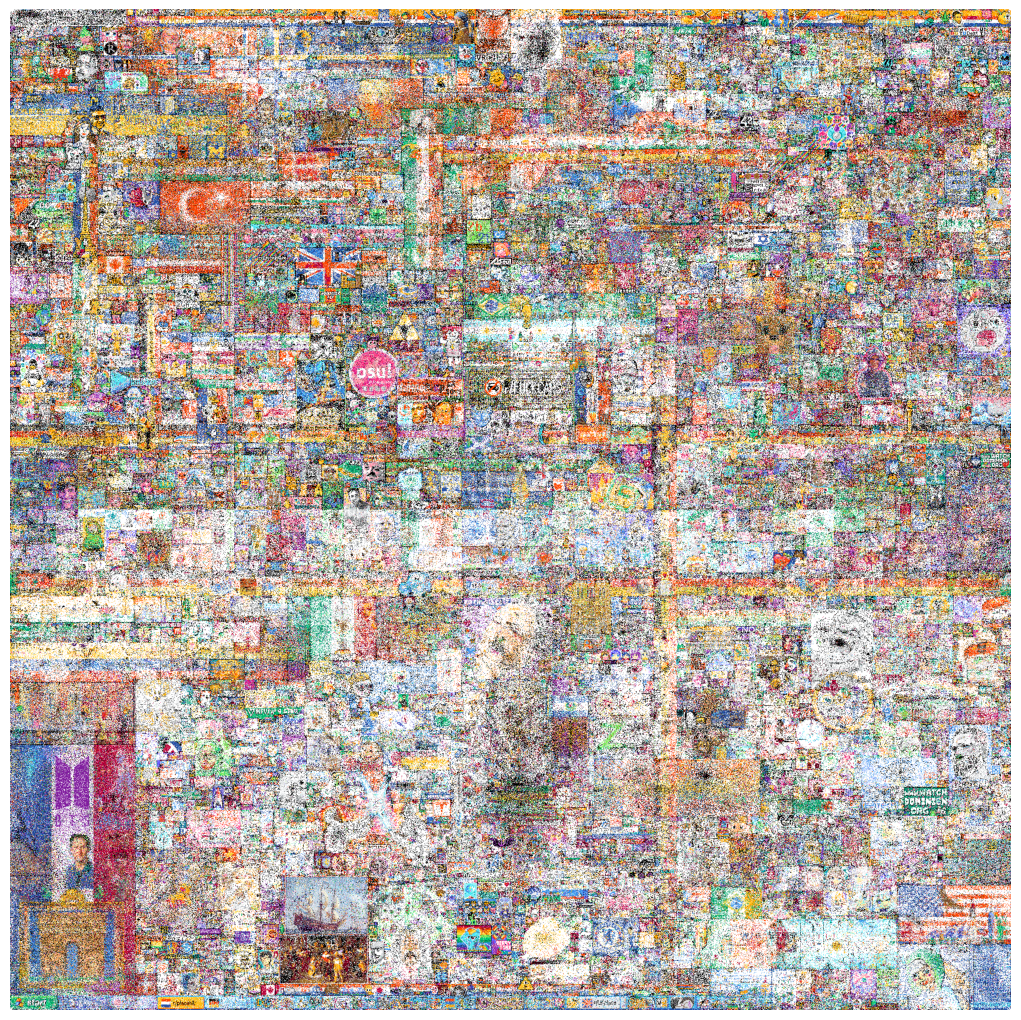

In [79]:
# plot 
canvas = np.ones((2000, 2000, 3), dtype=np.uint8) * 255 

for _, row in last_placed_bots.iterrows(): 
    x, y, color = row['x'], row['y'], row['pixel_color']
    r, g, b = tuple(int(color[i:i+2], 16) for i in (1, 3, 5))
    canvas[y, x] = [r, g, b]

plt.figure(figsize=(13, 13))
plt.imshow(canvas)
plt.axis("off")
plt.show()

In [22]:
# real_users activity 
human_activity = df.join(bots, on='user_id', how='anti').with_columns(pl.lit('human').alias('user_type'))

In [26]:
human_activity

shape: (145_498_720, 7)
┌─────────────────────────┬─────────┬─────────────┬──────┬──────┬──────────────────┬───────────┐
│ timestamp               ┆ user_id ┆ pixel_color ┆ x    ┆ y    ┆ time_diff        ┆ user_type │
│ ---                     ┆ ---     ┆ ---         ┆ ---  ┆ ---  ┆ ---              ┆ ---       │
│ datetime[μs]            ┆ u32     ┆ str         ┆ i32  ┆ i32  ┆ duration[μs]     ┆ str       │
╞═════════════════════════╪═════════╪═════════════╪══════╪══════╪══════════════════╪═══════════╡
│ 2022-04-01 12:44:10.315 ┆ 8130601 ┆ #7EED56     ┆ 42   ┆ 42   ┆ null             ┆ human     │
│ 2022-04-01 12:44:22.671 ┆ 2855887 ┆ #00A368     ┆ 999  ┆ 999  ┆ null             ┆ human     │
│ 2022-04-01 12:44:26.626 ┆ 8535757 ┆ #3690EA     ┆ 44   ┆ 42   ┆ null             ┆ human     │
│ 2022-04-01 12:44:31.703 ┆ 7813788 ┆ #D4D7D9     ┆ 2    ┆ 2    ┆ null             ┆ human     │
│ 2022-04-01 12:44:44.409 ┆ 1207367 ┆ #3690EA     ┆ 23   ┆ 23   ┆ null             ┆ human     │
│ …                       ┆ …       ┆ …           ┆ …    ┆ …    ┆ …                ┆ …         │
│ 2022-04-05 00:14:00.051 ┆ 2242069 ┆ #FFFFFF     ┆ 84   ┆ 1773 ┆ 23m 8s 800ms     ┆ human     │
│ 2022-04-05 00:14:00.066 ┆ 8614134 ┆ #FFFFFF     ┆ 408  ┆ 493  ┆ 2h 14m 32s 400ms ┆ human     │
│ 2022-04-05 00:14:00.172 ┆ 6721767 ┆ #FFFFFF     ┆ 770  ┆ 866  ┆ 7m 43s 100ms     ┆ human     │
│ 2022-04-05 00:14:00.195 ┆ 2920474 ┆ #FFFFFF     ┆ 1046 ┆ 1721 ┆ 1d 1h 14m 3s     ┆ human     │
│ 2022-04-05 00:14:00.207 ┆ 4025188 ┆ #FFFFFF     ┆ 0    ┆ 1999 ┆ 57m 34s 600ms    ┆ human     │
└─────────────────────────┴─────────┴─────────────┴──────┴──────┴──────────────────┴───────────┘

In [ ]:
# redundancy
human_activity.with_columns(pl.col('pixel_color').shift().over(['x', 'y']).alias('last_color')).filter(pl.col('pixel_color') == pl.col('last_color'))

shape: (28_160_050, 8)
┌─────────────────┬──────────┬─────────────┬──────┬──────┬────────────────┬───────────┬────────────┐
│ timestamp       ┆ user_id  ┆ pixel_color ┆ x    ┆ y    ┆ time_diff      ┆ user_type ┆ last_color │
│ ---             ┆ ---      ┆ ---         ┆ ---  ┆ ---  ┆ ---            ┆ ---       ┆ ---        │
│ datetime[μs]    ┆ u32      ┆ str         ┆ i32  ┆ i32  ┆ duration[μs]   ┆ str       ┆ str        │
╞═════════════════╪══════════╪═════════════╪══════╪══════╪════════════════╪═══════════╪════════════╡
│ 2022-04-01      ┆ 10203556 ┆ #00A368     ┆ 999  ┆ 999  ┆ null           ┆ human     ┆ #00A368    │
│ 13:03:21.501    ┆          ┆             ┆      ┆      ┆                ┆           ┆            │
│ 2022-04-01      ┆ 1561667  ┆ #2450A4     ┆ 999  ┆ 999  ┆ null           ┆ human     ┆ #2450A4    │
│ 13:03:54.334    ┆          ┆             ┆      ┆      ┆                ┆           ┆            │
│ 2022-04-01      ┆ 3522499  ┆ #2450A4     ┆ 998  ┆ 999  ┆ null           ┆ human     ┆ #2450A4    │
│ 13:04:01.639    ┆          ┆             ┆      ┆      ┆                ┆           ┆            │
│ 2022-04-01      ┆ 4686185  ┆ #2450A4     ┆ 999  ┆ 998  ┆ null           ┆ human     ┆ #2450A4    │
│ 13:04:01.978    ┆          ┆             ┆      ┆      ┆                ┆           ┆            │
│ 2022-04-01      ┆ 6107951  ┆ #000000     ┆ 998  ┆ 0    ┆ null           ┆ human     ┆ #000000    │
│ 13:04:19.831    ┆          ┆             ┆      ┆      ┆                ┆           ┆            │
│ …               ┆ …        ┆ …           ┆ …    ┆ …    ┆ …              ┆ …         ┆ …          │
│ 2022-04-05      ┆ 2242069  ┆ #FFFFFF     ┆ 84   ┆ 1773 ┆ 23m 8s 800ms   ┆ human     ┆ #FFFFFF    │
│ 00:14:00.051    ┆          ┆             ┆      ┆      ┆                ┆           ┆            │
│ 2022-04-05      ┆ 8614134  ┆ #FFFFFF     ┆ 408  ┆ 493  ┆ 2h 14m 32s     ┆ human     ┆ #FFFFFF    │
│ 00:14:00.066    ┆          ┆             ┆      ┆      ┆ 400ms          ┆           ┆            │
│ 2022-04-05      ┆ 6721767  ┆ #FFFFFF     ┆ 770  ┆ 866  ┆ 7m 43s 100ms   ┆ human     ┆ #FFFFFF    │
│ 00:14:00.172    ┆          ┆             ┆      ┆      ┆                ┆           ┆            │
│ 2022-04-05      ┆ 2920474  ┆ #FFFFFF     ┆ 1046 ┆ 1721 ┆ 1d 1h 14m 3s   ┆ human     ┆ #FFFFFF    │
│ 00:14:00.195    ┆          ┆             ┆      ┆      ┆                ┆           ┆            │
│ 2022-04-05      ┆ 4025188  ┆ #FFFFFF     ┆ 0    ┆ 1999 ┆ 57m 34s 600ms  ┆ human     ┆ #FFFFFF    │
│ 00:14:00.207    ┆          ┆             ┆      ┆      ┆                ┆           ┆            │
└─────────────────┴──────────┴─────────────┴──────┴──────┴────────────────┴───────────┴────────────┘

In [81]:
print(human_activity['time_diff'].quantile(0))
print(human_activity['time_diff'].quantile(0.1))
print(human_activity['time_diff'].quantile(0.25))
print(human_activity['time_diff'].quantile(0.5))
print(human_activity['time_diff'].quantile(0.75))
print(human_activity['time_diff'].quantile(0.9))
print(human_activity['time_diff'].quantile(1))

0:00:00
0:05:09.100000
0:05:26.600000
0:07:58.500000
0:31:19.200000
3:27:57.500000
3 days, 11:00:57


In [82]:
# last placed 
last_placed_humans = human_activity.with_columns(pl.struct(['x', 'y']).is_last_distinct().alias('last_placed')).filter(pl.col('last_placed') == True).to_pandas()

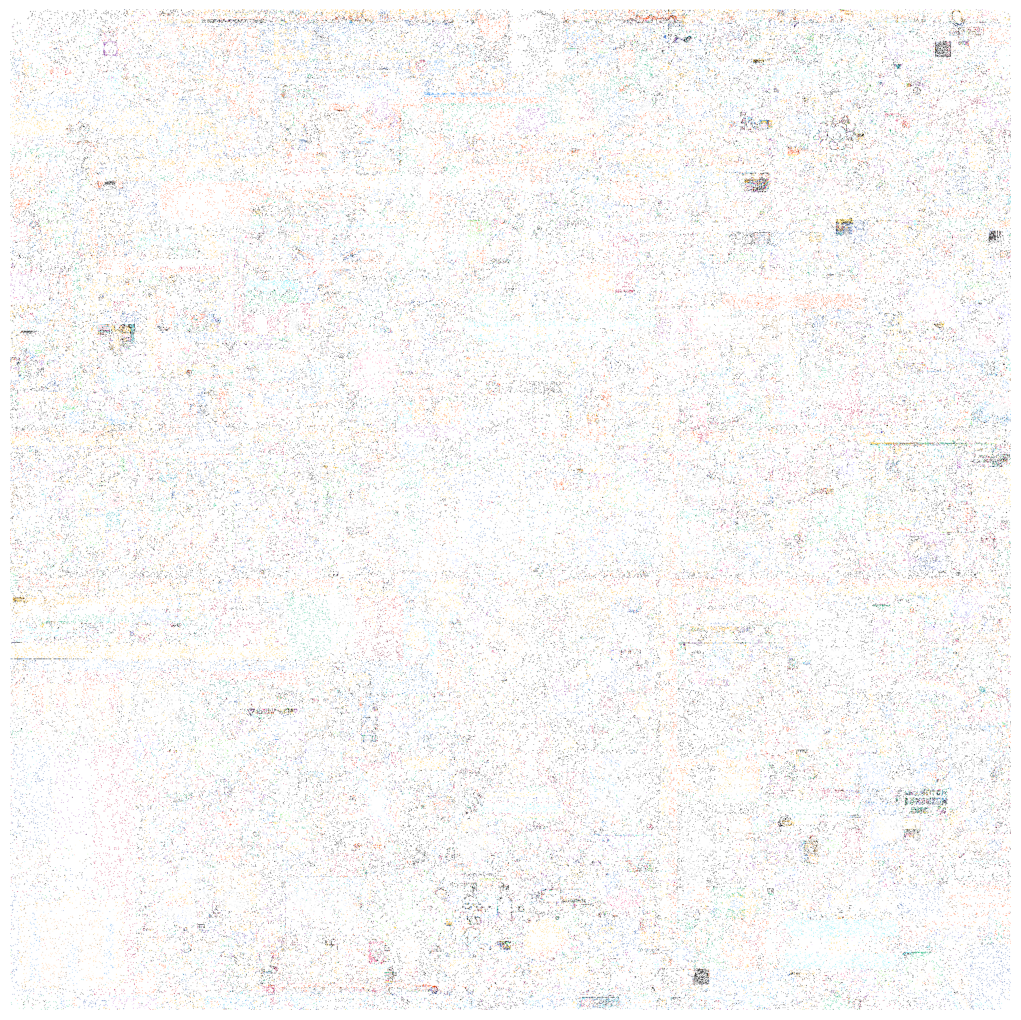

In [83]:
# plot 
canvas = np.ones((2000, 2000, 3), dtype=np.uint8) * 255 

for _, row in last_placed_humans.iterrows(): 
    x, y, color = row['x'], row['y'], row['pixel_color']
    r, g, b = tuple(int(color[i:i+2], 16) for i in (1, 3, 5))
    canvas[y, x] = [r, g, b]

plt.figure(figsize=(13, 13))
plt.imshow(canvas)
plt.axis("off")
plt.show()

In [10]:
df = pl.concat([human_activity, bot_activity.drop('consecutive_duplicates')]).drop_nulls().with_columns(pl.col('time_diff').dt.total_seconds()).select(['time_diff', 'user_type']).to_pandas()

In [ ]:
# freeing up memory

del human_activity
del bot_activity
del canvas
del bots
del last_placed_humans
del last_placed_bots

c:\Users\Brandon Kim\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin : Removed 35155868 rows containing non-finite values.
c:\Users\Brandon Kim\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.


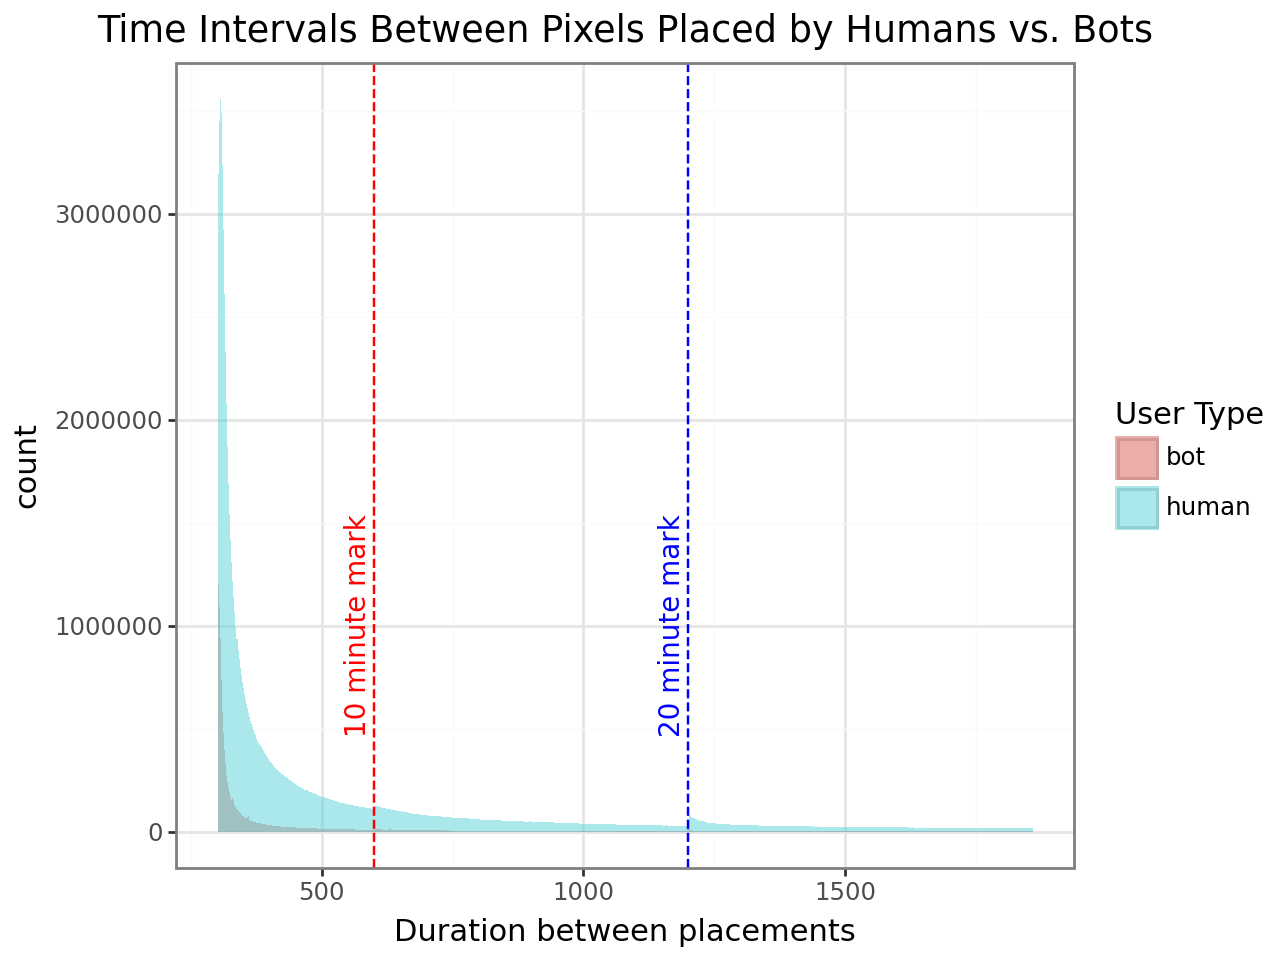

In [ ]:
# left this out of the analysis, but wanted to see distribution difference between humans and bots 
(
    pn.ggplot(df, pn.aes(x='time_diff', fill='user_type'))
    + pn.geom_histogram(binwidth=2, position="identity", alpha=0.5) 
    + pn.geom_vline(xintercept=600, color='red', linetype='dashed')
    + pn.geom_vline(xintercept=1200, color='blue', linetype='dashed')
    + pn.annotate('text', x=570, y=1000000, angle=90, size=10, label='10 minute mark', color='red')
    + pn.annotate('text', x=1170, y=1000000, angle=90, size=10, label='20 minute mark', color='blue')
    + pn.scale_x_continuous(limits=(300, 1860))
    + pn.theme_bw()
    + pn.labs(x = 'Duration between placements', title = 'Time Intervals Between Pixels Placed by Humans vs. Bots', fill = 'User Type')
)